# Project: ( Gather, Wrangle and Investigate Twitter Data sets)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
> In this project, i will  be gathering and investigating three data sets. **The WeRateDogs Twitter Archive, The tweet image predictions file and an additional data from Twitter API**. I will use necessay summary statistics and visualisations to show important relationships and distributions between features.
I will be answering relevant questions with the data sets.

In [122]:
#import necessary libraries
import pandas as pd
import numpy as np
import requests
import json

<a id='wrangling'></a>

<a id='wrangling'></a>
## Data Wrangling

## Gather
- Gather the weratedogs  data
- Gather the image predictions data
- Gather the additional twitter data using twitter api

##### Gather the weratedogs data

In [123]:
#Read the data into a meaningful dataframe
df_WeRateDogs= pd.read_csv('twitter-archive-enhanced.csv')

##### Gather image predictions data

In [124]:
import requests
import os

In [5]:
#pass the html file in through using request library
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [6]:
# save to html file
with open ("image-predictions.tsv", mode='wb') as file:
    file.write(response.content)

In [7]:
image_predictions_df= pd.read_csv('image-predictions.tsv', sep='\t')

##### Gather additional twitter data

In [125]:
#import necessary libraries
import json
import pandas as pd

In [9]:
!pip install tweepy

In [10]:
#code shown for gathering data via twitter api
codes= """
tweet_ids = df_1.tweet_id.values
len(tweet_ids) 

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive 
count = 0 
fails_dict = {} 
start = timer() # Save each tweet's returned JSON as a new line in a .txt file 
with open('tweet_json.txt', 'w') as 
outfile: 
    # This loop will likely take 20-30 
minutes to run because of Twitter's rate 
limit 
for tweet_id in tweet_ids: 
    count += 1 
    print(str(count) + ": " +
str(tweet_id)) 
        try: tweet = 
api.get_status(tweet_id, 
tweet_mode='extended')
            print("Success") 
            json.dump(tweet._json, outfile) 
            outfile.write('\n') 
                except tweepy.TweepError as e: 
            print("Fail") 
            fails_dict[tweet_id] = e 
            pass 
end = timer() 
print(end - start) 
print(fails_dict)
"""

In [126]:
#create an empty list and and append the extracted data from the tweet cop txt file into it and store it in a dataframe
df_list =[]
with open('tweet-json copy','r') as json_file:
    for line in json_file:
        data = json.loads(line)
        Tweet_id = data['id']
        Retweet_count = data['retweet_count']
        Favorite_count = data['favorite_count']
        df_list.append({'Tweet_id' : Tweet_id ,
                    'Retweet_count' : Retweet_count,
                    'Favorite_count' : Favorite_count})
df=pd.DataFrame(df_list, columns=['Tweet_id','Retweet_count','Favorite_count'])
        
df

Tweet_id  Retweet_count  Favorite_count
0     892420643555336193           8853           39467
1     892177421306343426           6514           33819
2     891815181378084864           4328           25461
3     891689557279858688           8964           42908
4     891327558926688256           9774           41048
...                  ...            ...             ...
2349  666049248165822465             41             111
2350  666044226329800704            147             311
2351  666033412701032449             47             128
2352  666029285002620928             48             132
2353  666020888022790149            532            2535

[2354 rows x 3 columns]

## Assess
#### assess Weratedogs data

In [127]:
#get the visual assessment
df_WeRateDogs

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
...                  ...                    ...                  ...   
2351  666049248165822465                    NaN                  NaN   
2352  666044226329800704                    NaN                  NaN   
2353  666033412701032449                    NaN                  NaN   
2354  666029285002620928                    NaN                  NaN   
2355  666020888022790149                    NaN                  NaN   

                      timestamp  \
0     2017-08-01 16:23:56 +0000   
1     2017-08-01 00:17:27 +0000   
2     2017-07-31 00:18:03 +0000   
3     2017-07-30 15:58:51 +0000   
4     2017-07-29 16:00:24 +0000   
...                         ...   
2351  2015-11-16 00:24:50 +0000   
2352  2015-11-16 00:04:52 +0000   
2353  2015-11-15 23:21:54 +0000   
2354  2015-11-15 23:05:30 +0000   
2355  2015-11-15 22:32:08 +0000   

                                                 source  \
0     <a href="http://twitter.com/download/iphone" r...   
1     <a href="http://twitter.com/download/iphone" r...   
2     <a href="http://twitter.com/download/iphone" r...   
3     <a href="http://twitter.com/download/iphone" r...   
4     <a href="http://twitter.com/download/iphone" r...   
...                                                 ...   
2351  <a href="http://twitter.com/download/iphone" r...   
2352  <a href="http://twitter.com/download/iphone" r...   
2353  <a href="http://twitter.com/download/iphone" r...   
2354  <a href="http://twitter.com/download/iphone" r...   
2355  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
0     This is Phineas. He's a mystical boy. Only eve...                  NaN   
1     This is Tilly. She's just checking pup on you....                  NaN   
2     This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3     This is Darla. She commenced a snooze mid meal...                  NaN   
4     This is Franklin. He would like you to stop ca...                  NaN   
...                                                 ...                  ...   
2351  Here we have a 1949 1st generation vulpix. Enj...                  NaN   
2352  This is a purebred Piers Morgan. Loves to Netf...                  NaN   
2353  Here is a very happy pup. Big fan of well-main...                  NaN   
2354  This is a western brown Mitsubishi terrier. Up...                  NaN   
2355  Here we have a Japanese Irish Setter. Lost eye...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
0                          NaN                        NaN   
1                          NaN                        NaN   
2                          NaN                        NaN   
3                          NaN                        NaN   
4                          NaN                        NaN   
...                        ...                        ...   
2351                       NaN                        NaN   
2352                       NaN                        NaN   
2353                       NaN                        NaN   
2354                       NaN                        NaN   
2355                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
0     https://twitter.com/dog_rates/status/892420643...                13   
1     https://twitter.com/dog_rates/status/892177421...                13   
2     https://twitter.com/dog_rates/status/891815181...                12   
3     https://twitt

In [128]:
#get the first five rows
df_WeRateDogs.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

In [129]:
#get the last five rows
df_WeRateDogs.tail()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
2351  666049248165822465                    NaN                  NaN   
2352  666044226329800704                    NaN                  NaN   
2353  666033412701032449                    NaN                  NaN   
2354  666029285002620928                    NaN                  NaN   
2355  666020888022790149                    NaN                  NaN   

                      timestamp  \
2351  2015-11-16 00:24:50 +0000   
2352  2015-11-16 00:04:52 +0000   
2353  2015-11-15 23:21:54 +0000   
2354  2015-11-15 23:05:30 +0000   
2355  2015-11-15 22:32:08 +0000   

                                                 source  \
2351  <a href="http://twitter.com/download/iphone" r...   
2352  <a href="http://twitter.com/download/iphone" r...   
2353  <a href="http://twitter.com/download/iphone" r...   
2354  <a href="http://twitter.com/download/iphone" r...   
2355  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
2351  Here we have a 1949 1st generation vulpix. Enj...                  NaN   
2352  This is a purebred Piers Morgan. Loves to Netf...                  NaN   
2353  Here is a very happy pup. Big fan of well-main...                  NaN   
2354  This is a western brown Mitsubishi terrier. Up...                  NaN   
2355  Here we have a Japanese Irish Setter. Lost eye...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
2351                       NaN                        NaN   
2352                       NaN                        NaN   
2353                       NaN                        NaN   
2354                       NaN                        NaN   
2355                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
2351  https://twitter.com/dog_rates/status/666049248...                 5   
2352  https://twitter.com/dog_rates/status/666044226...                 6   
2353  https://twitter.com/dog_rates/status/666033412...                 9   
2354  https://twitter.com/dog_rates/status/666029285...                 7   
2355  https://twitter.com/dog_rates/status/666020888...                 8   

      rating_denominator  name doggo floofer pupper puppo  
2351                  10  None  None    None   None  None  
2352                  10     a  None    None   None  None  
2353                  10     a  None    None   None  None  
2354                  10     a  None    None   None  None  
2355                  10  None  None    None   None  None

In [130]:
#programmatic assessment
df_WeRateDogs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [131]:
#get the dimension
df_WeRateDogs.shape

(2356, 17)

In [132]:
#get  the missing values in eacg features
df_WeRateDogs.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [133]:
#check for the duplicate observations or features
df_WeRateDogs.duplicated().sum()

0

In [134]:
#check the data types of each features
df_WeRateDogs.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

In [135]:
#get the count of each unique values in each feature
df_WeRateDogs.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [136]:
#get the count of each value in the retweet status id feature
df_WeRateDogs['retweeted_status_id'].value_counts()

8.874740e+17    1
6.704450e+17    1
6.671828e+17    1
6.661041e+17    1
7.717705e+17    1
               ..
7.950767e+17    1
7.840579e+17    1
8.222448e+17    1
8.224891e+17    1
6.675484e+17    1
Name: retweeted_status_id, Length: 181, dtype: int64

In [137]:
#check the count of each values in the doggo column
df_WeRateDogs['doggo'].value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [138]:
#check the count of each values in the flooofer column
df_WeRateDogs['floofer'].value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [139]:
#check the count of each values in the pupper column
df_WeRateDogs['pupper'].value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [140]:
#check the count of each values in the puppo column
df_WeRateDogs['puppo'].value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [141]:
#get the count of each value in the column
df_WeRateDogs['name'].value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [142]:
mask = df_WeRateDogs.name.str.contains('^[a-z]', regex=True) #df_WeRateDogs[mask].name.value_counts().sort_index()

In [143]:
 df_WeRateDogs[mask].name.value_counts().sort_index()

a               55
actually         2
all              1
an               7
by               1
getting          2
his              1
incredibly       1
infuriating      1
just             4
life             1
light            1
mad              2
my               1
not              2
officially       1
old              1
one              4
quite            4
space            1
such             1
the              8
this             1
unacceptable     1
very             5
Name: name, dtype: int64

In [144]:
#get the summary statistics 
df_WeRateDogs.describe()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
count  2.356000e+03           7.800000e+01         7.800000e+01   
mean   7.427716e+17           7.455079e+17         2.014171e+16   
std    6.856705e+16           7.582492e+16         1.252797e+17   
min    6.660209e+17           6.658147e+17         1.185634e+07   
25%    6.783989e+17           6.757419e+17         3.086374e+08   
50%    7.196279e+17           7.038708e+17         4.196984e+09   
75%    7.993373e+17           8.257804e+17         4.196984e+09   
max    8.924206e+17           8.862664e+17         8.405479e+17   

       retweeted_status_id  retweeted_status_user_id  rating_numerator  \
count         1.810000e+02              1.810000e+02       2356.000000   
mean          7.720400e+17              1.241698e+16         13.126486   
std           6.236928e+16              9.599254e+16         45.876648   
min           6.661041e+17              7.832140e+05          0.000000   
25%           7.186315e+17              4.196984e+09         10.000000   
50%           7.804657e+17              4.196984e+09         11.000000   
75%           8.203146e+17              4.196984e+09         12.000000   
max           8.874740e+17              7.874618e+17       1776.000000   

       rating_denominator  
count         2356.000000  
mean            10.455433  
std              6.745237  
min              0.000000  
25%             10.000000  
50%             10.000000  
75%             10.000000  
max            170.000000

#### Assess Image_Predictions data

In [145]:
#copy the data in a new dataframe
image_predictions_df1=image_predictions_df.copy()

In [146]:
#do a visual assessment of the image predictions data
image_predictions_df

tweet_id                                          jpg_url  \
0     666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
...                  ...                                              ...   
2068  890971913173991426  https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg   
2069  891087950875897856  https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg   
2070  891327558926688256  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg   
2072  891815181378084864  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg   
2073  892177421306343426  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg   

      img_num                 Dog_breed   p1_conf  p1_dog                  p2  \
0           1    Welsh_springer_spaniel  0.465074    True              collie   
1           1                   redbone  0.506826    True  miniature_pinscher   
2           1           German_shepherd  0.596461    True            malinois   
3           1       Rhodesian_ridgeback  0.408143    True             redbone   
4           1        miniature_pinscher  0.560311    True          Rottweiler   
...       ...                       ...       ...     ...                 ...   
2068        1               Appenzeller  0.341703    True       Border_collie   
2069        1  Chesapeake_Bay_retriever  0.425595    True       Irish_terrier   
2070        2                    basset  0.555712    True    English_springer   
2072        1                 Chihuahua  0.716012    True            malamute   
2073        1                 Chihuahua  0.323581    True            Pekinese   

       p2_conf  p2_dog                           p3   p3_conf  p3_dog  
0     0.156665    True            Shetland_sheepdog  0.061428    True  
1     0.074192    True          Rhodesian_ridgeback  0.072010    True  
2     0.138584    True                   bloodhound  0.116197    True  
3     0.360687    True           miniature_pinscher  0.222752    True  
4     0.243682    True                     Doberman  0.154629    True  
...        ...     ...                          ...       ...     ...  
2068  0.199287    True                    ice_lolly  0.193548   False  
2069  0.116317    True              Indian_elephant  0.076902   False  
2070  0.225770    True  German_short-haired_pointer  0.175219    True  
2072  0.078253    True                       kelpie  0.031379    True  
2073  0.090647    True                     papillon  0.068957    True  

[1532 rows x 12 columns]

In [147]:
#get the first five rows of the data
image_predictions_df.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num               Dog_breed   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

In [148]:
#get the last five rows of the data
image_predictions_df.tail()

tweet_id                                          jpg_url  \
2068  890971913173991426  https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg   
2069  891087950875897856  https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg   
2070  891327558926688256  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg   
2072  891815181378084864  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg   
2073  892177421306343426  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg   

      img_num                 Dog_breed   p1_conf  p1_dog                p2  \
2068        1               Appenzeller  0.341703    True     Border_collie   
2069        1  Chesapeake_Bay_retriever  0.425595    True     Irish_terrier   
2070        2                    basset  0.555712    True  English_springer   
2072        1                 Chihuahua  0.716012    True          malamute   
2073        1                 Chihuahua  0.323581    True          Pekinese   

       p2_conf  p2_dog                           p3   p3_conf  p3_dog  
2068  0.199287    True                    ice_lolly  0.193548   False  
2069  0.116317    True              Indian_elephant  0.076902   False  
2070  0.225770    True  German_short-haired_pointer  0.175219    True  
2072  0.078253    True                       kelpie  0.031379    True  
2073  0.090647    True                     papillon  0.068957    True

In [149]:
#get the dimension of the data
image_predictions_df.shape

(1532, 12)

In [150]:
#do a programmatic assessment
image_predictions_df.info

<bound method DataFrame.info of                 tweet_id                                          jpg_url  \
0     666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
...                  ...                                              ...   
2068  890971913173991426  https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg   
2069  891087950875897856  https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg   
2070  891327558926688256  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg   
2072  891815181378084864  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg   
2073  892177421306343426  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg   

      img_num                 Dog_breed   p

In [151]:
#check the missing values in each feature
image_predictions_df.isnull().sum()

tweet_id     0
jpg_url      0
img_num      0
Dog_breed    0
p1_conf      0
p1_dog       0
p2           0
p2_conf      0
p2_dog       0
p3           0
p3_conf      0
p3_dog       0
dtype: int64

In [152]:
#check if there are duplicates in the data
image_predictions_df.duplicated().sum()

0

In [153]:
#check the data types of each feature
image_predictions_df.dtypes

tweet_id      object
jpg_url       object
img_num        int64
Dog_breed     object
p1_conf      float64
p1_dog          bool
p2            object
p2_conf      float64
p2_dog          bool
p3            object
p3_conf      float64
p3_dog          bool
dtype: object

In [154]:
#do the summary statistics
image_predictions_df.describe()

img_num      p1_conf      p2_conf       p3_conf
count  1532.000000  1532.000000  1532.000000  1.532000e+03
mean      1.212794     0.613823     0.141327  6.180374e-02
std       0.574115     0.259735     0.102482  5.255780e-02
min       1.000000     0.044333     0.000023  2.160900e-07
25%       1.000000     0.390981     0.057067  1.540992e-02
50%       1.000000     0.614025     0.127964  4.995100e-02
75%       1.000000     0.850559     0.203748  9.527215e-02
max       4.000000     0.999956     0.467678  2.734190e-01

In [155]:
#do the value counts of each observation in  p1 column
image_predictions_df['p1'].value_counts()

KeyError: 'p1'

In [ ]:
#do the value counts of each observation in  p1_conf column
image_predictions_df['p1_conf'].value_counts()

In [ ]:
#do the value counts of each observation in  p1_dog column
image_predictions_df['p1_dog'].value_counts()

#### Assess additional twitter data

In [156]:
#do the visual assessment
df

Tweet_id  Retweet_count  Favorite_count
0     892420643555336193           8853           39467
1     892177421306343426           6514           33819
2     891815181378084864           4328           25461
3     891689557279858688           8964           42908
4     891327558926688256           9774           41048
...                  ...            ...             ...
2349  666049248165822465             41             111
2350  666044226329800704            147             311
2351  666033412701032449             47             128
2352  666029285002620928             48             132
2353  666020888022790149            532            2535

[2354 rows x 3 columns]

In [157]:
#get the first five observations
df.head()

Tweet_id  Retweet_count  Favorite_count
0  892420643555336193           8853           39467
1  892177421306343426           6514           33819
2  891815181378084864           4328           25461
3  891689557279858688           8964           42908
4  891327558926688256           9774           41048

In [158]:
#get the last five observations
df.tail()

Tweet_id  Retweet_count  Favorite_count
2349  666049248165822465             41             111
2350  666044226329800704            147             311
2351  666033412701032449             47             128
2352  666029285002620928             48             132
2353  666020888022790149            532            2535

In [159]:
#get the dimension
df.shape

(2354, 3)

In [160]:
#get the data type of each feature
df.dtypes

Tweet_id          int64
Retweet_count     int64
Favorite_count    int64
dtype: object

In [161]:
#check for the missing values
df.isnull().sum()

Tweet_id          0
Retweet_count     0
Favorite_count    0
dtype: int64

In [162]:
#check for duplicates
df.duplicated().sum()

0

In [163]:
#get the number of unique values 
df.nunique()

Tweet_id          2354
Retweet_count     1724
Favorite_count    2007
dtype: int64

In [164]:
#run the summary statistics
df.describe()

Tweet_id  Retweet_count  Favorite_count
count  2.354000e+03    2354.000000     2354.000000
mean   7.426978e+17    3164.797366     8080.968564
std    6.852812e+16    5284.770364    11814.771334
min    6.660209e+17       0.000000        0.000000
25%    6.783975e+17     624.500000     1415.000000
50%    7.194596e+17    1473.500000     3603.500000
75%    7.993058e+17    3652.000000    10122.250000
max    8.924206e+17   79515.000000   132810.000000

### Quality Issues
#### WeRateDogs Data
- retweeted_status_timestamp is a string instead of datetime
- missing values in some features of the data set
- Incorrect ratings
- Non descriptive naming
- Dog names not well corrected
- Id fileds should be in string



#### Image Predictions data
- Id fields not in string datatype
- Unstandardized Dog breeds
- some features are not well descriptive
- 


### Clean


- Convert the retweeted_status_timestamp to a datetime
- treat the important missing values using appropriate imputation methods
- deal with the incorrect ratings in the WeRateDogs data
- Rename some features to make them more descriptive
- Correct the dog names
### Define
- Deal with the missing values in the **WeRateDogs data**

### Code

In [165]:
#fill the missing values with median values
median_id1=df_WeRateDogs['in_reply_to_status_id'].median()
median_id2=df_WeRateDogs['in_reply_to_user_id'].median()


In [166]:
df_WeRateDogs['in_reply_to_status_id'].fillna(median_id1, inplace=True)

In [167]:
df_WeRateDogs['in_reply_to_user_id'].fillna(median_id2, inplace=True)

### Test

In [168]:
#check to see if the missing values have been dealt with
df_WeRateDogs.isnull().sum()

tweet_id                         0
in_reply_to_status_id            0
in_reply_to_user_id              0
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

### Define
- Convert features to the right data types

### Code


In [169]:
#convert timestamp to datatime
df_WeRateDogs['timestamp']=df_WeRateDogs['timestamp'].astype('datetime64[ns]')

In [170]:
#convert retweeted_status_timestamp to datatime
df_WeRateDogs['retweeted_status_timestamp']=df_WeRateDogs['retweeted_status_timestamp'].astype('datetime64[ns]')

### Test

In [171]:
#check the data types.
df_WeRateDogs.dtypes

tweet_id                               int64
in_reply_to_status_id                float64
in_reply_to_user_id                  float64
timestamp                     datetime64[ns]
source                                object
text                                  object
retweeted_status_id                  float64
retweeted_status_user_id             float64
retweeted_status_timestamp    datetime64[ns]
expanded_urls                         object
rating_numerator                       int64
rating_denominator                     int64
name                                  object
doggo                                 object
floofer                               object
pupper                                object
puppo                                 object
dtype: object

### Define
- Dog names not well corrected

### Code

In [172]:
#standardize the column to have them all in capital letters
df_WeRateDogs['name']=df_WeRateDogs['name'].apply(lambda x: x.capitalize())

### Test

In [173]:
#comfirm the column
df_WeRateDogs['name'].value_counts()

None          745
A              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

### Define
- Rename some features to make them more descriptive

### Code

In [174]:
#rename the name feature to Dog_name
df_WeRateDogs=df_WeRateDogs.rename(columns={'name':'Dog_name'})

### Test

In [175]:
#check that the column name has been changed to Dog_name
df_WeRateDogs['Dog_name']

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
          ...   
2351        None
2352           A
2353           A
2354           A
2355        None
Name: Dog_name, Length: 2356, dtype: object

### Define
- Incorrect ratings

### Code

In [176]:
#create a dataframe where the rating denominator is 10
df_WeRateDogs=df_WeRateDogs[df_WeRateDogs['rating_denominator'] >=10]

### Test

In [177]:
#check if the column only has denominator with 10
df_WeRateDogs['rating_denominator']

0       10
1       10
2       10
3       10
4       10
        ..
2351    10
2352    10
2353    10
2354    10
2355    10
Name: rating_denominator, Length: 2353, dtype: int64

### Define
- make sure the Id fields are in string datatype in the Image Predictions data set

### Code

In [178]:
#change the tweet_id column to object
image_predictions_df['tweet_id']=image_predictions_df['tweet_id'].astype(str)

### Test

In [179]:
#verify that the data type has been changed
image_predictions_df.dtypes

tweet_id      object
jpg_url       object
img_num        int64
Dog_breed     object
p1_conf      float64
p1_dog          bool
p2            object
p2_conf      float64
p2_dog          bool
p3            object
p3_conf      float64
p3_dog          bool
dtype: object

### Define
- Make sure the id fileds in the WerateDogs data is changed to string

### Code

In [180]:
#comfirm the data type
df_WeRateDogs.dtypes

tweet_id                               int64
in_reply_to_status_id                float64
in_reply_to_user_id                  float64
timestamp                     datetime64[ns]
source                                object
text                                  object
retweeted_status_id                  float64
retweeted_status_user_id             float64
retweeted_status_timestamp    datetime64[ns]
expanded_urls                         object
rating_numerator                       int64
rating_denominator                     int64
Dog_name                              object
doggo                                 object
floofer                               object
pupper                                object
puppo                                 object
dtype: object

In [181]:
#convert the data type
df_WeRateDogs['tweet_id']=df_WeRateDogs['tweet_id'].astype(str)

### Test

In [182]:
#check the data type
df_WeRateDogs.dtypes

tweet_id                              object
in_reply_to_status_id                float64
in_reply_to_user_id                  float64
timestamp                     datetime64[ns]
source                                object
text                                  object
retweeted_status_id                  float64
retweeted_status_user_id             float64
retweeted_status_timestamp    datetime64[ns]
expanded_urls                         object
rating_numerator                       int64
rating_denominator                     int64
Dog_name                              object
doggo                                 object
floofer                               object
pupper                                object
puppo                                 object
dtype: object

### Define
- Convert the data type of id to string

### Code

In [183]:
#check the data type
df.dtypes

Tweet_id          int64
Retweet_count     int64
Favorite_count    int64
dtype: object

In [184]:
#convert the data type to string
df['Tweet_id']=df['Tweet_id'].astype(str)

### Test

In [185]:
#comfirm the data type
df.dtypes

Tweet_id          object
Retweet_count      int64
Favorite_count     int64
dtype: object

### Define
- Remove all false cases in the p1_dog feature

In [186]:
image_predictions_df.head(2)

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   

   img_num               Dog_breed   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True

### Code

In [187]:
#remove all the false cases by creating a dataframe for just the True in P1_dog
image_predictions_df=image_predictions_df[image_predictions_df['p1_dog']==True]

### Test

In [188]:
#comfirm that the p1_dog feature has only True cases
image_predictions_df['p1_dog'].value_counts()

True    1532
Name: p1_dog, dtype: int64

### Define
- Rename the p1 column to Dog_breed

### Code

In [189]:
#rename the p1 column to Dog breed
image_predictions_df=image_predictions_df.rename(columns={'p1':'Dog_breed'})

### Test

In [190]:
#comfirm the column
image_predictions_df.head(2)

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   

   img_num               Dog_breed   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True

### Define
- Rename the Tweet_id column to tweet_id

### Code

In [191]:
#rename the column
df=df.rename(columns={'Tweet_id':'tweet_id'})

### Test

In [192]:
#comfirm that the column name has been changed
df.columns

Index(['tweet_id', 'Retweet_count', 'Favorite_count'], dtype='object')

### Define
- Drop all cases where retweeted_status_id is null

### Code

In [193]:
#drop the  empty retweets 
df_WeRateDogs=df_WeRateDogs[df_WeRateDogs.retweeted_status_id.isnull()] 
df_WeRateDogs=df_WeRateDogs[df_WeRateDogs.retweeted_status_id.isnull()]
df_WeRateDogs=df_WeRateDogs[df_WeRateDogs.retweeted_status_id.isnull()] 

###  Test

In [194]:
#comfirm that we have original retweets
df_WeRateDogs['retweeted_status_id'].isnull()

0       True
1       True
2       True
3       True
4       True
        ... 
2351    True
2352    True
2353    True
2354    True
2355    True
Name: retweeted_status_id, Length: 2172, dtype: bool

## Tidyness Issues
### WeRateGogs Data
- Dog stage is one variable and hence should from single column, but the variable is spread across four columns
- Infromation about one observational unit(tweets) is spread across 3 dataframes

### Define
- Make Dog stage which is one variable form a single column 

### Code

In [195]:
#concat all the dog stages into one column
val=['tweet_id','in_reply_to_status_id','in_reply_to_user_id','timestamp','source','text','rating_numerator','rating_denominator','retweeted_status_id','retweeted_status_user_id',
    'retweeted_status_timestamp','expanded_urls','Dog_name']
df_WeRateDogs=pd.melt(df_WeRateDogs, id_vars=val, value_vars=['doggo','floofer','pupper','puppo'],
                     var_name='Dog_stages', value_name='stage')

In [196]:

#This is another method
#df_WeRateDogs['Dog_Stage']=df_WeRateDogs.doggo+df_WeRateDogs.floofer+df_WeRateDogs.pupper+df_WeRateDogs.puppo
#df_WeRateDogs.loc[df_WeRateDogs.Dog_Stage== 'doggopupper', 'Dog_Stage']= 'doggo, pupper'
#df_WeRateDogs.loc[df_WeRateDogs.Dog_Stage== 'doggopuppo', 'Dog_Stage']= 'doggo, puppo'
#df_WeRateDogs.loc[df_WeRateDogs.Dog_Stage== 'doggofloofer', 'Dog_Stage']= 'doggo, floofer'

In [197]:
#replace None with an empty string
df_WeRateDogs.stage.replace('None', 'np.nap', inplace=True)

### Test

In [198]:
#check to see that the column has the values in just the Dog_stages column.
df_WeRateDogs['Dog_stages'].value_counts()

doggo      2172
floofer    2172
pupper     2172
puppo      2172
Name: Dog_stages, dtype: int64

In [199]:
df_WeRateDogs['stage'].value_counts()

np.nap     8332
pupper      234
doggo        87
puppo        25
floofer      10
Name: stage, dtype: int64

### Define
- Create a rating column by dividing the rating_numerator feature by the rating_denominator feature

### Code

In [200]:
#create a column for rating
rating =df_WeRateDogs['rating_numerator']/df_WeRateDogs['rating_denominator']

In [201]:
#add the rating column to the df_WeRateDogs dataset
df_WeRateDogs['rating']=df_WeRateDogs['rating_numerator']/df_WeRateDogs['rating_denominator']

In [202]:
#drop the rating_numerator and rating_denominator columns
df_WeRateDogs.drop(columns=['rating_numerator','rating_denominator'], inplace=True, axis=1)

In [203]:
#convert the rating column into float
df_WeRateDogs['rating']=df_WeRateDogs['rating'].astype(float)

### Test

In [204]:
#check to see that the rating column is added already and that the rating_numerator and rating_denominator features have
#been dropped
df_WeRateDogs.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'Dog_name', 'Dog_stages',
       'stage', 'rating'],
      dtype='object')

In [205]:
#check the data type of the rating column
df_WeRateDogs.dtypes

tweet_id                              object
in_reply_to_status_id                float64
in_reply_to_user_id                  float64
timestamp                     datetime64[ns]
source                                object
text                                  object
retweeted_status_id                  float64
retweeted_status_user_id             float64
retweeted_status_timestamp    datetime64[ns]
expanded_urls                         object
Dog_name                              object
Dog_stages                            object
stage                                 object
rating                               float64
dtype: object

### Combine the Data sets

In [206]:
#join the imagepredictions and weratedogs datasets
merged_datasets =pd.merge(image_predictions_df,df_WeRateDogs, on=['tweet_id'])

In [207]:
#join the 3 data sets finally
twitter_archive_master =pd.merge(merged_datasets,df, on=['tweet_id'])

In [208]:
#check the joined data
twitter_archive_master.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
2  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
3  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
4  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   

   img_num               Dog_breed   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1  Welsh_springer_spaniel  0.465074    True              collie   
2        1  Welsh_springer_spaniel  0.465074    True              collie   
3        1  Welsh_springer_spaniel  0.465074    True              collie   
4        1                 redbone  0.506826    True  miniature_pinscher   

    p2_conf  p2_dog                   p3  ...  retweeted_status_id  \
0  0.156665    True    Shetland_sheepdog  ...                  NaN   
1  0.156665    True    Shetland_sheepdog  ...                  NaN   
2  0.156665    True    Shetland_sheepdog  ...                  NaN   
3  0.156665    True    Shetland_sheepdog  ...                  NaN   
4  0.074192    True  Rhodesian_ridgeback  ...                  NaN   

   retweeted_status_user_id  retweeted_status_timestamp  \
0                       NaN                         NaT   
1                       NaN                         NaT   
2                       NaN                         NaT   
3                       NaN                         NaT   
4                       NaN                         NaT   

                                       expanded_urls Dog_name Dog_stages  \
0  https://twitter.com/dog_rates/status/666020888...     None      doggo   
1  https://twitter.com/dog_rates/status/666020888...     None    floofer   
2  https://twitter.com/dog_rates/status/666020888...     None     pupper   
3  https://twitter.com/dog_rates/status/666020888...     None      puppo   
4  https://twitter.com/dog_rates/status/666029285...        A      doggo   

    stage  rating  Retweet_count Favorite_count  
0  np.nap     0.8            532           2535  
1  np.nap     0.8            532           2535  
2  np.nap     0.8            532           2535  
3  np.nap     0.8            532           2535  
4  np.nap     0.7             48            132  

[5 rows x 27 columns]

In [210]:
#save the join data set in a csv file
twitter_archive_master.to_csv('twitter_archive_master.csv', index=False)

<a id='eda'></a>
## Exploratory Data Analysis

In [211]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [212]:
twitter_archive_master.head(2)

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   

   img_num               Dog_breed   p1_conf  p1_dog      p2   p2_conf  \
0        1  Welsh_springer_spaniel  0.465074    True  collie  0.156665   
1        1  Welsh_springer_spaniel  0.465074    True  collie  0.156665   

   p2_dog                 p3  ...  retweeted_status_id  \
0    True  Shetland_sheepdog  ...                  NaN   
1    True  Shetland_sheepdog  ...                  NaN   

   retweeted_status_user_id  retweeted_status_timestamp  \
0                       NaN                         NaT   
1                       NaN                         NaT   

                                       expanded_urls Dog_name Dog_stages  \
0  https://twitter.com/dog_rates/status/666020888...     None      doggo   
1  https://twitter.com/dog_rates/status/666020888...     None    floofer   

    stage  rating  Retweet_count Favorite_count  
0  np.nap     0.8            532           2535  
1  np.nap     0.8            532           2535  

[2 rows x 27 columns]

### Question 1( What is the distribution of some quantitative features?)

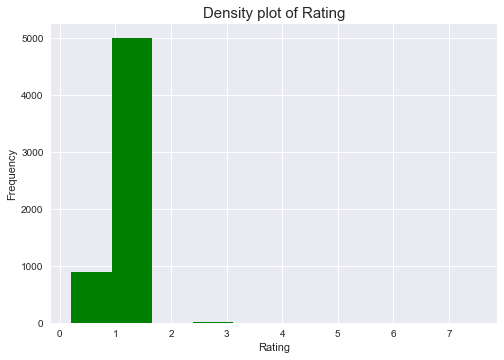

In [228]:
#plot the distribution of rating
twitter_archive_master['rating'].plot(kind='hist',  color='g')
plt.title('Distribution  plot of Rating',fontsize=15)
plt.xlabel('Rating')
plt.style.use('seaborn')

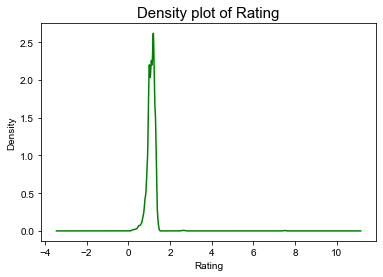

In [213]:
#plot the distribution of rating
twitter_archive_master['rating'].plot(kind='kde',  color='g')
plt.title('Density plot of Rating',fontsize=15)
plt.xlabel('Rating')
plt.style.use('seaborn')

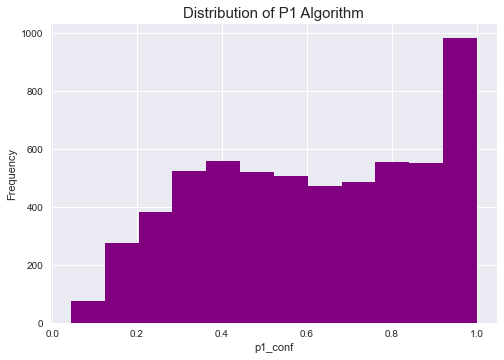

In [214]:
#plot the distribution of p1_conf
twitter_archive_master['p1_conf'].plot(kind='hist', bins=12, color='purple')
plt.title('Distribution of P1 Algorithm',fontsize=15)
plt.xlabel('p1_conf')
plt.style.use('seaborn')

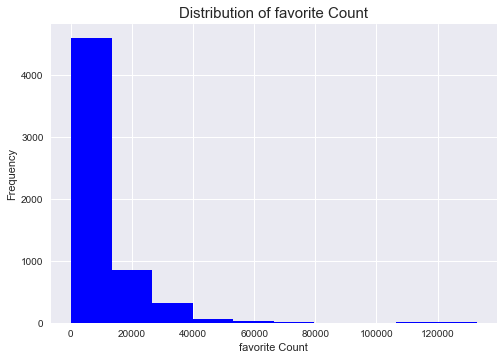

In [215]:
#plot the distribution of favorite count
twitter_archive_master['Favorite_count'].plot(kind='hist', color='blue')
plt.title('Distribution of favorite Count',fontsize=15)

plt.xlabel('favorite Count');

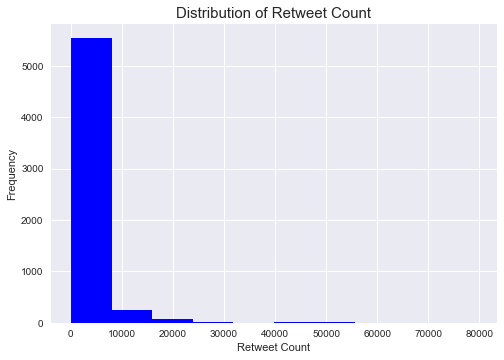

In [216]:
twitter_archive_master['Retweet_count'].plot(kind='hist', color='blue')
plt.title('Distribution of Retweet Count',fontsize=15)
plt.xlabel('Retweet Count');

### Question 2 (Which Dog_stage has the highest average rating?)

In [217]:
twitter_archive_master['stage'].value_counts()

np.nap     5662
pupper      152
doggo        58
puppo        20
floofer       8
Name: stage, dtype: int64

In [218]:
twitter_archive_master.groupby('stage')['rating'].mean()

stage
doggo      1.189655
floofer    1.187500
np.nap     1.096233
pupper     1.106579
puppo      1.205000
Name: rating, dtype: float64

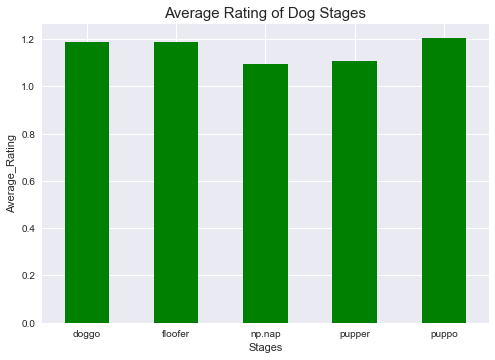

In [219]:
twitter_archive_master.groupby('stage')['rating'].mean().plot(kind='bar', rot=0, color='g')
plt.title('Average Rating of Dog Stages',fontsize=15)
plt.xlabel('Stages')
plt.ylabel('Average_Rating');

### Question 3( What is the relationship between Rating  and Retweet Count?)

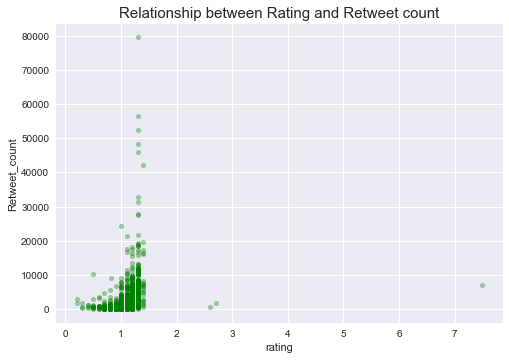

In [227]:
twitter_archive_master.plot(kind='scatter', x='rating', y='Retweet_count', color='g', alpha=0.1 );
plt.title('Relationship between Rating and Retweet count', fontsize=15);

### Question 4( What is the relationship between p1_conf  and rating?)

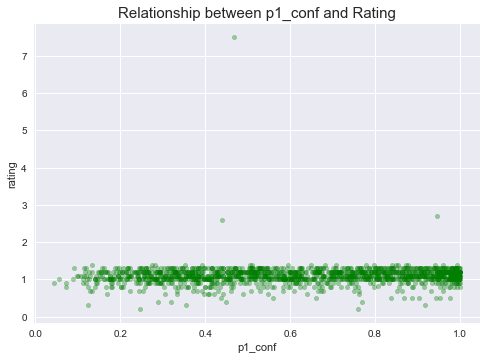

In [226]:
twitter_archive_master.plot(kind='scatter', x='p1_conf', y='rating', color='g', alpha=0.1)
plt.title('Relationship between p1_conf and Rating', fontsize=15);

<a id='conclusions'></a>
### Conclusions
>I have succesfully cleaned the datasets, i have combined all the data sets into one based on common column "tweet_id".
From my analysis, Puppo seems to have the highest average rating, some of the features are right skewed which means that the mean is greater than the median but the p1 histogram is left skewed, its mean is less than the median.
One of the features alomost had a bell curve when plotted using KDE, and which is the  Rating feature, its peak occurs between rating of 0 and 2.



### Limitations
>I discovered that some columns had wrong data types so I had to deal with that, I noticed that certain features have to be dropped and some has to be renamed so I also dealt with that. 
I also saw that it is better to work with situations where our p1 are all true so I dropped all the false cases or else we will be having wrong analysis. 
I also 

### References
>Udacity lessons, Python documentation, Stack overflow 
